# Tutorial 9
Application of SOM on synthetic data

In [26]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

## Example 1
Compare the SOM performance with the clustering algorithm and PCA from previous tutorial

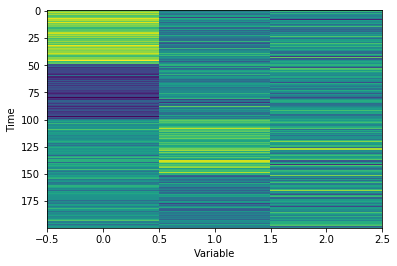

In [10]:
#load and visualize data
data = pd.read_csv('data.csv',header=None)

plt.imshow(data,aspect='auto')
plt.ylabel('Time')
plt.xlabel('Variable')
plt.show()

In [13]:
#manually identify the patterns present (mean features)
data_basic = []
data_basic.append(np.mean(data[:50],axis=0))
data_basic.append(np.mean(data[50:100],axis=0))
data_basic.append(np.mean(data[100:150],axis=0))
data_basic.append(np.mean(data[150:],axis=0))

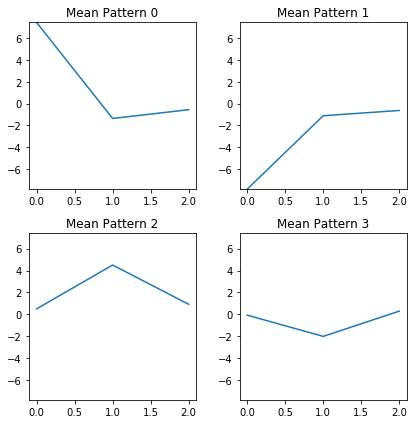

In [19]:
#plot the mean features
plt.figure(figsize=(6,6))

plt.subplot(2,2,1)
plt.plot(data_basic[0])
plt.title('Mean Pattern 0')
plt.ylim((np.min(data_basic),np.max(data_basic)))

plt.subplot(2,2,2)
plt.plot(data_basic[1])
plt.title('Mean Pattern 1')
plt.ylim((np.min(data_basic),np.max(data_basic)))

plt.subplot(2,2,3)
plt.plot(data_basic[2])
plt.title('Mean Pattern 2')
plt.ylim((np.min(data_basic),np.max(data_basic)))

plt.subplot(2,2,4)
plt.plot(data_basic[3])
plt.title('Mean Pattern 3')
plt.ylim((np.min(data_basic),np.max(data_basic)))

plt.tight_layout()
plt.show()

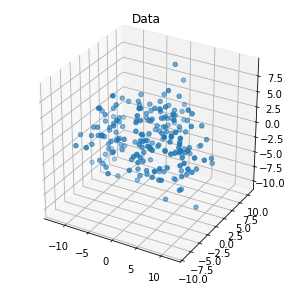

In [24]:
#plot the data in 3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[0],data[1],data[2])
plt.title('Data')
plt.show()

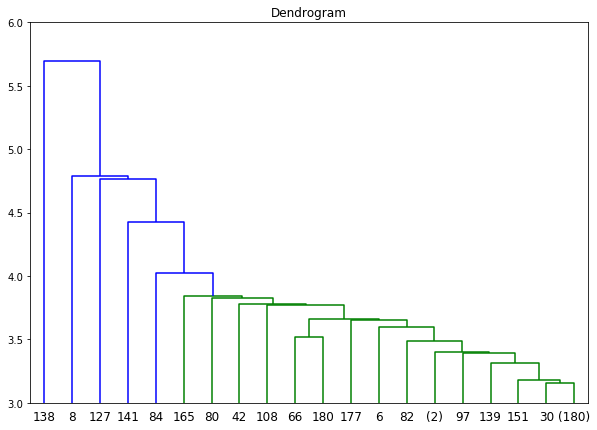

In [29]:
#cluster

linked = linkage(data,'single')
labelList = range(1, len(data))

plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending',
           truncate_mode='lastp',
           p=20)
plt.title('Dendrogram')
plt.ylim((3,6))
plt.show()

In [32]:
#now cluster
n_clusters = 4
cluster = AgglomerativeClustering(n_clusters=n_clusters, 
                                  affinity='euclidean', 
                                  linkage='ward')
cn = cluster.fit_predict(data)

#find mean pattern of each cluster
cluster_pattern = np.empty((n_clusters,np.shape(data)[1]))
for cluster_num in range(n_clusters):
    inds = np.argwhere(cn==cluster_num)
    cluster_pattern[cluster_num,:] = np.mean(data.iloc[np.squeeze(inds),:],axis=0)
    
cluster_obs = np.empty((np.shape(data)))
for ind in range(len(data)):
    cluster_obs[ind] = cluster_pattern[cn[ind]]

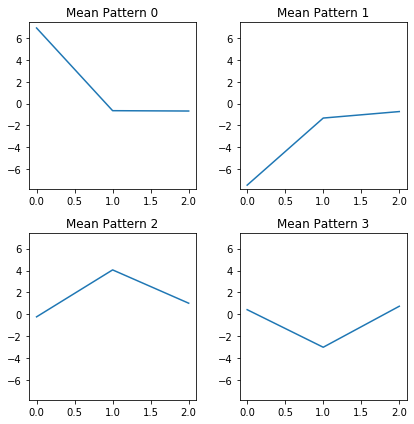

In [33]:
#plot the mean features -- compare to those identified above -- pretty similar!
plt.figure(figsize=(6,6))

plt.subplot(2,2,1)
plt.plot(cluster_pattern[0])
plt.title('Mean Pattern 0')
plt.ylim((np.min(data_basic),np.max(data_basic)))

plt.subplot(2,2,2)
plt.plot(cluster_pattern[1])
plt.title('Mean Pattern 1')
plt.ylim((np.min(data_basic),np.max(data_basic)))

plt.subplot(2,2,3)
plt.plot(cluster_pattern[2])
plt.title('Mean Pattern 2')
plt.ylim((np.min(data_basic),np.max(data_basic)))

plt.subplot(2,2,4)
plt.plot(cluster_pattern[3])
plt.title('Mean Pattern 3')
plt.ylim((np.min(data_basic),np.max(data_basic)))

plt.tight_layout()
plt.show()

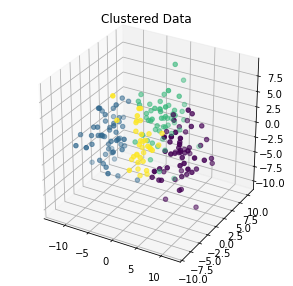

In [34]:
#plot the clustered data in 3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[0],data[1],data[2],c=cn)
plt.title('Clustered Data')
plt.show()

In [35]:
#do PCA

n_modes = np.min(np.shape(data))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_


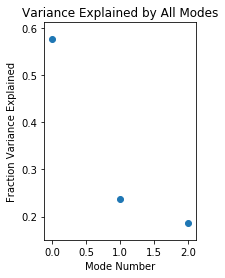

In [40]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.show()

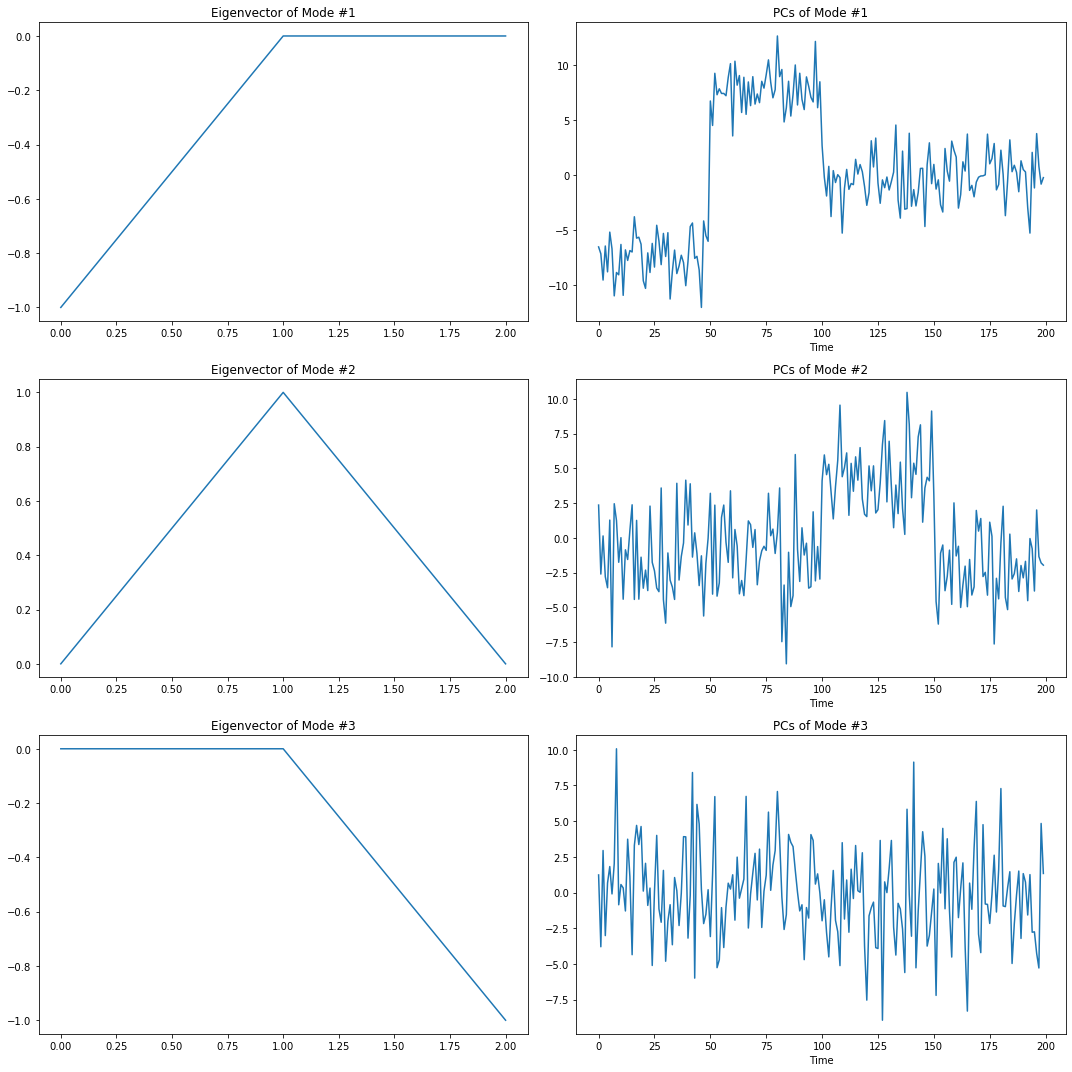

In [41]:
#plot the first n modes and PCs

n = 3 #looks like the first two modes explain pretty much everything!

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(eigvecs[kk,:])
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Time')
    
    plt.tight_layout()

In [50]:
#run SOM -- this code creates/trains the SOM and calculates stats of interest

nx = 2
ny = 3

data = data.get_values()

#make, initialize, and train the SOM
som = MiniSom(nx, ny, 3, sigma=1, learning_rate=0.5) # initialization of (ny x nx) SOM
som.pca_weights_init(data)
som.train_random(data, 500) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

#calculate the BMU of each observation
bmus = []
for kk in range(len(data)):
    bmus.append(som.winner(data[kk]))
    
#inds gives the sequential coordinates of each SOM node (useful for plotting)
inds = []
for ii in range(ny):
    for jj in range(nx):
        inds.append((ii,jj))
     
#compute the frequency of each BMU
freq = np.zeros((nx,ny))
for bmu in bmus:
    freq[bmu[0]][bmu[1]]+=1
freq/=len(data)

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  


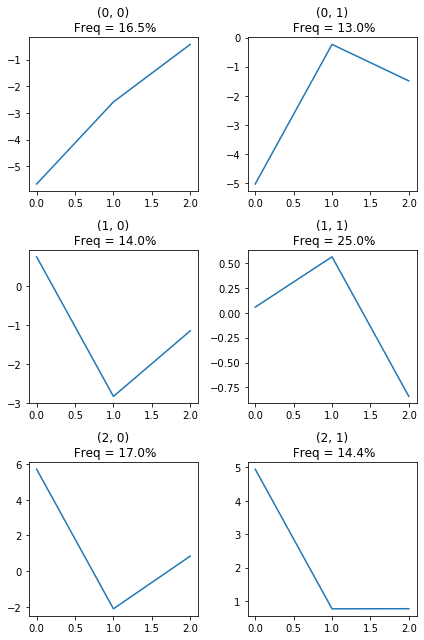

In [53]:
#visualize

plt.figure(figsize=(3*nx,3*ny))
for kk in range(nx*ny):   
    plt.subplot(ny,nx,kk+1)
    indx = inds[kk][1]
    indy = inds[kk][0]
    plt.plot(bmu_patterns[indx][indy])
    plt.title(str(inds[kk]) + '\n Freq = ' + str(freq[indx][indy]*100)[:4] + '%')
    
plt.tight_layout()